In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### What to do
- Plot all the countrise that have participated in Olympics
- Plot the distribution of participated Disciplines
- Plot the distribution of participated atheletes
- Did not participate
- Color the countries based on the number of medals won.

### Read teams dataset

In [2]:
df_teams = pd.read_excel("data/Teams.xlsx")

In [3]:
print(df_teams.head(),"\n")
print(df_teams.info(),"\n")
print(f"Countries: {len(df_teams['NOC'].unique().tolist())}, Disciplines: {len(df_teams['Discipline'].unique().tolist())}, Events: {len(df_teams['Event'].unique().tolist())}")
print(sorted(df_teams['Event'].unique().tolist()))

      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None 

Countries: 84, Disciplines: 20, Events: 36
['4 x 400m Relay Mixed', 'Baseball', 'Duet', 'Group All-Around', 'Men', "Men's 4 x 100m Freestyle Relay", "Men's 4 x 100m Medley Relay", "Men's 4 x 100m Relay", "Men's 4 x 200m Freestyle Rela

- No missing values
- Countries 84 Discipline 20
- Events are mainly Men XXX, Women XXX, Mixed XXX. But for
    - Artistic Swimming - Duet and Team --> Womens
    - Rhythmic Gymnastics - Group All-Around --> Womens
    - Baseball/Softball 
        - Softball --> Womens
        - Baseball --> Mens

How many Disciplines each country participated?
How many countries each Discipline had participants from?

In [4]:
df_teams_discipline_NOC = df_teams.groupby(by='Discipline').agg({'NOC':'count'}).sort_values(by='NOC', ascending=False)
print(df_teams_discipline_NOC)

df_teams_bs = df_teams[df_teams['Discipline']=='Baseball/Softball'].groupby(by='NOC').agg({'NOC':'count'})
df_teams_bs#.sort_values(by='NOC', axis=0, ascending=False)

                     NOC
Discipline              
Swimming             113
Athletics             79
Cycling Track         64
Archery               53
Fencing               52
Beach Volleyball      48
Table Tennis          48
Artistic Swimming     32
Football              28
Artistic Gymnastics   24
Volleyball            24
Basketball            24
Handball              24
Hockey                24
Rugby Sevens          24
Water Polo            22
Triathlon             18
3x3 Basketball        16
Rhythmic Gymnastics   14
Baseball/Softball     12


NOC
NOC                          
Australia                   1
Canada                      1
Dominican Republic          1
Israel                      1
Italy                       1
Japan                       2
Mexico                      2
Republic of Korea           1
United States of America    2

<AxesSubplot:xlabel='Discipline'>

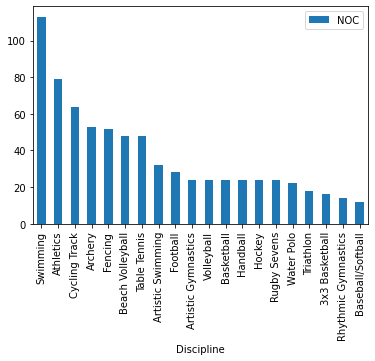

In [5]:
df_teams_discipline_NOC.plot.bar()

<AxesSubplot:ylabel='Frequency'>

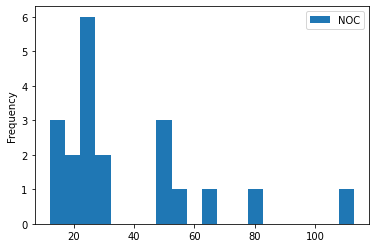

In [6]:
df_teams_discipline_NOC.plot.hist(by='NOC',bins=20)

In [7]:
least_participated_disciplines = df_teams_discipline_NOC[df_teams_discipline_NOC['NOC']<15].index.tolist()
print(least_participated_disciplines)
df_teams_least_disciplines = df_teams[df_teams['Discipline'].isin(least_participated_disciplines)].groupby(by=['NOC','Discipline']).agg({'Discipline':'count'})
df_teams_least_disciplines.groupby(by=['NOC']).agg({'Discipline':'count'}).sort_values(by='Discipline', ascending=False)

['Rhythmic Gymnastics', 'Baseball/Softball']


Discipline
NOC                                   
Australia                            2
Israel                               2
United States of America             2
Japan                                2
Italy                                2
Canada                               1
Dominican Republic                   1
Egypt                                1
Bulgaria                             1
Azerbaijan                           1
Brazil                               1
Mexico                               1
People's Republic of China           1
ROC                                  1
Republic of Korea                    1
Ukraine                              1
Belarus                              1
Uzbekistan                           1

### Read world geo dataset

In [8]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [9]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [10]:
print(f"{type(world)}, {world.geometry.name}")
print(world.geometry.geom_type.value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
Polygon         148
MultiPolygon     29
dtype: int64


<AxesSubplot:>

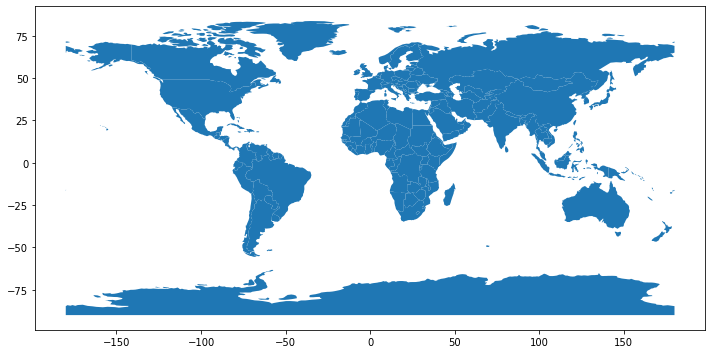

In [11]:
world.plot(figsize=(12,8))

### Fix the discrepancy in the countries

In [12]:
geopandas_countries = set(world['name'].unique().tolist())
teams_countries = set(df_teams['NOC'].unique().tolist())
print("geopandas_countries", len(geopandas_countries), "teams_countries", len(teams_countries))

geopandas_countries 177 teams_countries 84


In [13]:
print("Countries in teams but not found in the geo dataset")
diff_country_names = list(teams_countries-geopandas_countries); diff_country_names

Countries in teams but not found in the geo dataset


['Republic of Moldova',
 'Hong Kong, China',
 'Chinese Taipei',
 'Great Britain',
 'Dominican Republic',
 'ROC',
 'Liechtenstein',
 'Singapore',
 'Islamic Republic of Iran',
 'Bahrain',
 'Czech Republic',
 'Republic of Korea',
 "People's Republic of China"]

In [14]:
subs = ["Bah", "Taipei", "Czech", "Domi", "Great", "Britain", "Hong", "Iran", "China", "Liech", "Korea", "ROD", "Mol", "Sing"]
for country in geopandas_countries:
    for sub in subs:
        if sub in country:
            print(sub, "- ", country)

China -  China
Bah -  Bahamas
Korea -  North Korea
Mol -  Moldova
Korea -  South Korea
Domi -  Dominican Rep.
Iran -  Iran
Czech -  Czechia


In [15]:
team_to_geopandas_countries = { "People's Republic of China" : "China",
                                'Republic of Korea': 'South Korea',
                                'Republic of Moldova':'Moldova',
                                'Czech Republic':'Czechia',
                                'Islamic Republic of Iran':'Iran',
                                'Dominican Republic':'Dominican Rep.' }

# Countries that are not present in the geopands. So ignore these
'''
    'Great Britain',
    'Singapore',
    'Bahrain',
    'ROC',
    'Liechtenstein',
    'Hong Kong, China',
    'Chinese Taipei'
'''

"\n    'Great Britain',\n    'Singapore',\n    'Bahrain',\n    'ROC',\n    'Liechtenstein',\n    'Hong Kong, China',\n    'Chinese Taipei'\n"

In [16]:
for country in team_to_geopandas_countries.keys():
    print(df_teams[df_teams['NOC'] == country]['NOC'].tolist()[0])

People's Republic of China
Republic of Korea
Republic of Moldova
Czech Republic
Islamic Republic of Iran
Dominican Republic


In [17]:
# Fix the known country discrepancies
df_teams.loc[df_teams['NOC'] == "People's Republic of China"] = team_to_geopandas_countries["People's Republic of China"]
df_teams.loc[df_teams['NOC'] == "Republic of Korea"] = team_to_geopandas_countries["Republic of Korea"]
df_teams.loc[df_teams['NOC'] == "Republic of Moldova"] = team_to_geopandas_countries["Republic of Moldova"]
df_teams.loc[df_teams['NOC'] == "Czech Republic"] = team_to_geopandas_countries["Czech Republic"]
df_teams.loc[df_teams['NOC'] == "Islamic Republic of Iran"] = team_to_geopandas_countries["Islamic Republic of Iran"]
df_teams.loc[df_teams['NOC'] == "Dominican Republic"] = team_to_geopandas_countries["Dominican Republic"]

### Merge teams and world datasets to create  a new dataset - country, Discipline, geometry

In [18]:
teams_ = df_teams.groupby(by="NOC").agg({'Discipline':'count'})
teams_.reset_index(inplace=True)
print(teams_.isna().sum())
teams_.fillna(0)
teams_

NOC           0
Discipline    0
dtype: int64


NOC  Discipline
0                     Angola           1
1                  Argentina          10
2                  Australia          35
3                    Austria           5
4                 Azerbaijan           1
..                       ...         ...
79  United States of America          47
80                Uzbekistan           1
81                 Venezuela           1
82                   Vietnam           1
83                    Zambia           1

[84 rows x 2 columns]

array([[<AxesSubplot:title={'center':'Discipline'}>]], dtype=object)

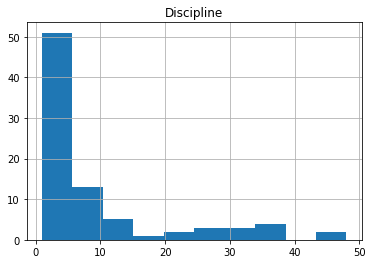

In [19]:
teams_.hist('Discipline', bins=10)

                         NOC  Discipline
43                     Japan          48
79  United States of America          47
41                     Italy          37
29                   Germany          36
2                  Australia          35
..                       ...         ...
47             Liechtenstein           1
49                  Malaysia           1
51                   Moldova           1
54                   Morocco           1
83                    Zambia           1

[84 rows x 2 columns]


<AxesSubplot:xlabel='NOC'>

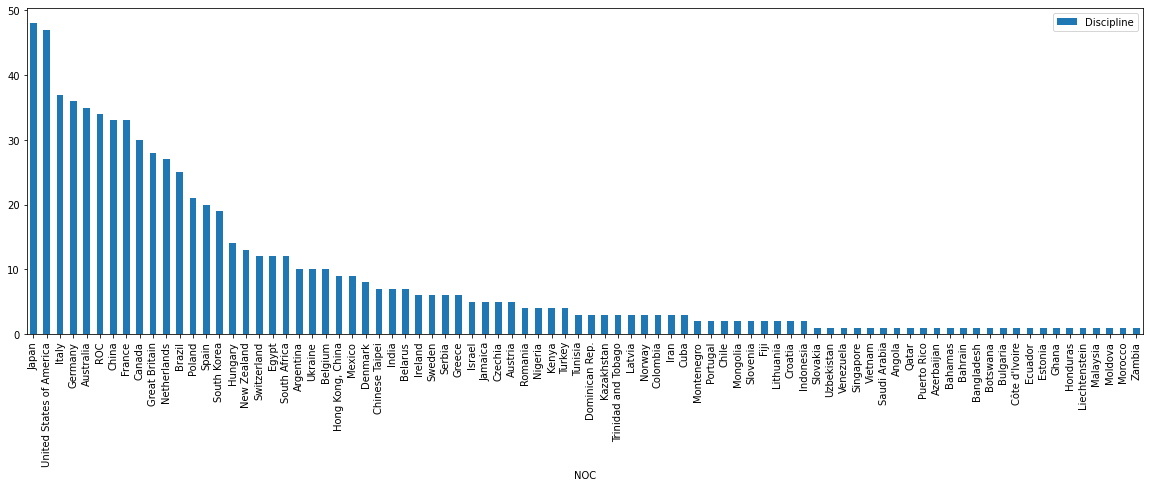

In [20]:
teams_sorted = teams_.sort_values(by='Discipline', ascending=False)
print(teams_sorted)
teams_sorted.plot.bar(x='NOC',y='Discipline', figsize=(20,6))

In [21]:
teams_1sport = teams_[teams_['Discipline']<=5]
teams_1sport

NOC  Discipline
0                Angola           1
3               Austria           5
4            Azerbaijan           1
5               Bahamas           1
6               Bahrain           1
7            Bangladesh           1
10             Botswana           1
12             Bulgaria           1
14                Chile           2
17             Colombia           3
18              Croatia           2
19                 Cuba           3
20              Czechia           5
21        Côte d'Ivoire           1
23       Dominican Rep.           3
24              Ecuador           1
26              Estonia           1
27                 Fiji           2
30                Ghana           1
33             Honduras           1
37            Indonesia           2
38                 Iran           3
40               Israel           5
42              Jamaica           5
44           Kazakhstan           3
45                Kenya           4
46               Latvia           3
47        Liechtenstein           1
48            Lithuania           2
49             Malaysia           1
51              Moldova           1
52             Mongolia           2
53           Montenegro           2
54              Morocco           1
57              Nigeria           4
58               Norway           3
60             Portugal           2
61          Puerto Rico           1
62                Qatar           1
64              Romania           4
65         Saudi Arabia           1
67            Singapore           1
68             Slovakia           1
69             Slovenia           2
75  Trinidad and Tobago           3
76              Tunisia           3
77               Turkey           4
80           Uzbekistan           1
81            Venezuela           1
82              Vietnam           1
83               Zambia           1

In [22]:
world_teams = world.merge(teams_, how="left", left_on=['name'], right_on=['NOC'])
print("Type of DataFrame : ", type(world_teams),world_teams.shape[0])
world_teams.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

                        NOC  Discipline  
0                      Fiji         2.0  
1                       NaN         NaN  
2                       NaN         NaN  
3                    Canada        30.0  
4  United States of America        47.0

In [23]:
print(len(world_teams['NOC'].unique()))
world_teams['NOC'].unique()

78


array(['Fiji', nan, 'Canada', 'United States of America', 'Kazakhstan',
       'Uzbekistan', 'Indonesia', 'Argentina', 'Chile', 'Kenya',
       'Dominican Rep.', 'Bahamas', 'Norway', 'South Africa', 'Mexico',
       'Brazil', 'Colombia', 'Honduras', 'Venezuela', 'France', 'Ecuador',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Botswana', 'Nigeria', 'Ghana',
       "Côte d'Ivoire", 'Zambia', 'Angola', 'Israel', 'Tunisia', 'Qatar',
       'Vietnam', 'South Korea', 'Mongolia', 'India', 'Bangladesh',
       'Iran', 'Sweden', 'Belarus', 'Ukraine', 'Poland', 'Austria',
       'Hungary', 'Moldova', 'Romania', 'Lithuania', 'Latvia', 'Estonia',
       'Germany', 'Bulgaria', 'Greece', 'Turkey', 'Croatia',
       'Switzerland', 'Belgium', 'Netherlands', 'Portugal', 'Spain',
       'Ireland', 'New Zealand', 'Australia', 'China', 'Italy', 'Denmark',
       'Azerbaijan', 'Malaysia', 'Slovenia', 'Slovakia', 'Czechia',
       'Japan', 'Saudi Arabia', 'Morocco', 'Egypt', 'Serbia',
       'Montenegro', 'Tr

### Countries - Disciplines

In [24]:
world_teams_wo_nan = world_teams[~(world_teams['NOC'].isnull())]
print(type(world_teams_wo_nan))
print(world_teams_wo_nan.info())
world_teams_wo_nan

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 0 to 175
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     77 non-null     int64   
 1   continent   77 non-null     object  
 2   name        77 non-null     object  
 3   iso_a3      77 non-null     object  
 4   gdp_md_est  77 non-null     float64 
 5   geometry    77 non-null     geometry
 6   NOC         77 non-null     object  
 7   Discipline  77 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 5.4+ KB
None


pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
5     18556698           Asia                Kazakhstan    KAZ    460700.0   
6     29748859           Asia                Uzbekistan    UZB    202300.0   
..         ...            ...                       ...    ...         ...   
162   33986655         Africa                   Morocco    MAR    282800.0   
163   97041072         Africa                     Egypt    EGY   1105000.0   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   

                                              geometry  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
5    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   
6    POLYGON ((55.96819 41.30864, 55.92892 44.99586...   
..                                                 ...   
162  POLYGON ((-2.16991 35.16840, -1.79299 34.52792...   
163  POLYGON ((36.86623 22.00000, 32.90000 22.00000...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   

                          NOC  Discipline  
0                        Fiji         2.0  
3                      Canada        30.0  
4    United States of America        47.0  
5                  Kazakhstan         3.0  
6                  Uzbekistan         1.0  
..                        ...         ...  
162                   Morocco         1.0  
163                     Egypt        12.0  
172                    Serbia         6.0  
173                Montenegro         2.0  
175       Trinidad and Tobago         3.0  

[77 rows x 8 columns]

In [25]:
world_teams_ = world_teams
print(type(world_teams_))
print(world_teams_.info())
#world_teams_['Discipline'] = world_teams_['Discipline'].fillna(0)
world_teams_

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
 6   NOC         77 non-null     object  
 7   Discipline  77 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 12.4+ KB
None


pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
..                                                 ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   

                          NOC  Discipline  
0                        Fiji         2.0  
1                         NaN         NaN  
2                         NaN         NaN  
3                      Canada        30.0  
4    United States of America        47.0  
..                        ...         ...  
172                    Serbia         6.0  
173                Montenegro         2.0  
174                       NaN         NaN  
175       Trinidad and Tobago         3.0  
176                       NaN         NaN  

[177 rows x 8 columns]

In [26]:
# cmap='OrRd', Pastel1

<AxesSubplot:>

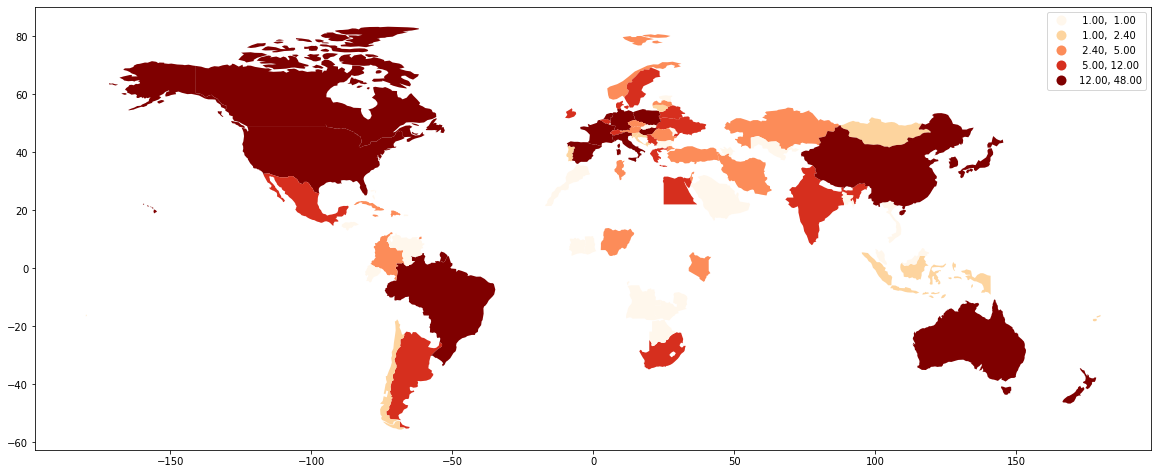

In [27]:
world_teams_wo_nan.plot(column='Discipline', cmap='OrRd', scheme='quantiles', figsize=(20,16),legend=True)#, 
                    #title = 'Countries Vs Disciplines')#,legend_kwds={"label": "Participation", "orientation":"horizontal"})

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

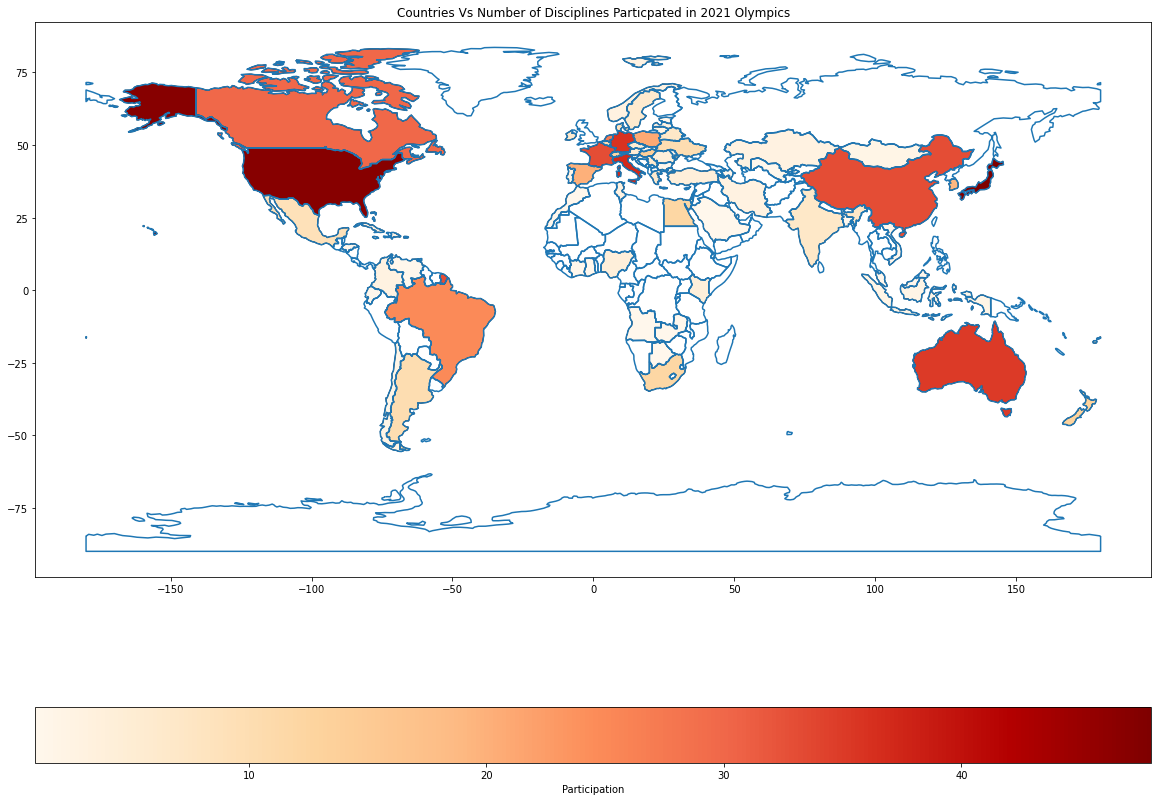

In [28]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))
world_teams_wo_nan.plot("Discipline", ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

Americas, & Australia is majorly participated

/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_81489/2080539903.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_teams_['centroid'] = world_teams_.centroid


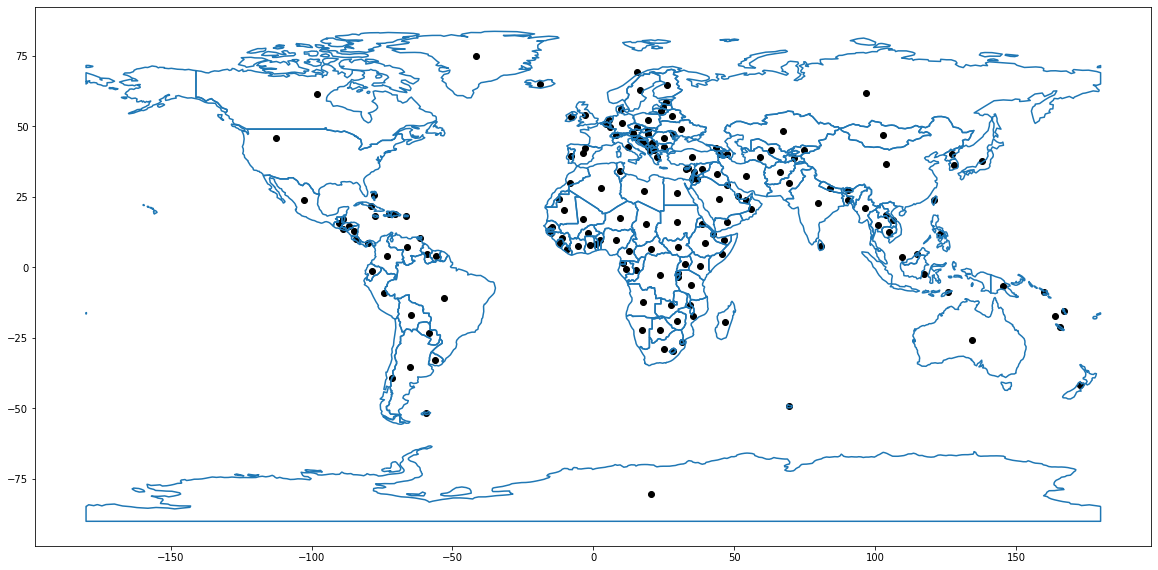

In [29]:
world_teams_['centroid'] = world_teams_.centroid
#print(world_teams_['centroid'])

#world_teams_centroid = world_teams_.set_geometry("centroid")
#world_teams_centroid.plot("Discipline", figsize=(20,16), legend=True)

#ax = world_teams_["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))
world_teams_["centroid"].plot(ax=ax, color="black")

world_teams_ = world_teams_.set_geometry("geometry")

In [30]:
world_teams_

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
..                                                 ...   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   

                          NOC  Discipline                     centroid  
0                        Fiji         2.0  POINT (163.85316 -17.31631)  
1                         NaN         NaN    POINT (34.75299 -6.25773)  
2                         NaN         NaN   POINT (-12.13783 24.29117)  
3                      Canada        30.0   POINT (-98.14238 61.46908)  
4    United States of America        47.0  POINT (-112.59944 45.70563)  
..                        ...         ...                          ...  
172                    Serbia         6.0    POINT (20.81965 44.23304)  
173                Montenegro         2.0    POINT (19.28618 42.78904)  
174                       NaN         NaN    POINT (20.89536 42.57937)  
175       Trinidad and Tobago         3.0   POINT (-61.33037 10.42824)  
176                       NaN         NaN     POINT (30.19862 7.29289)  

[177 rows x 9 columns]

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

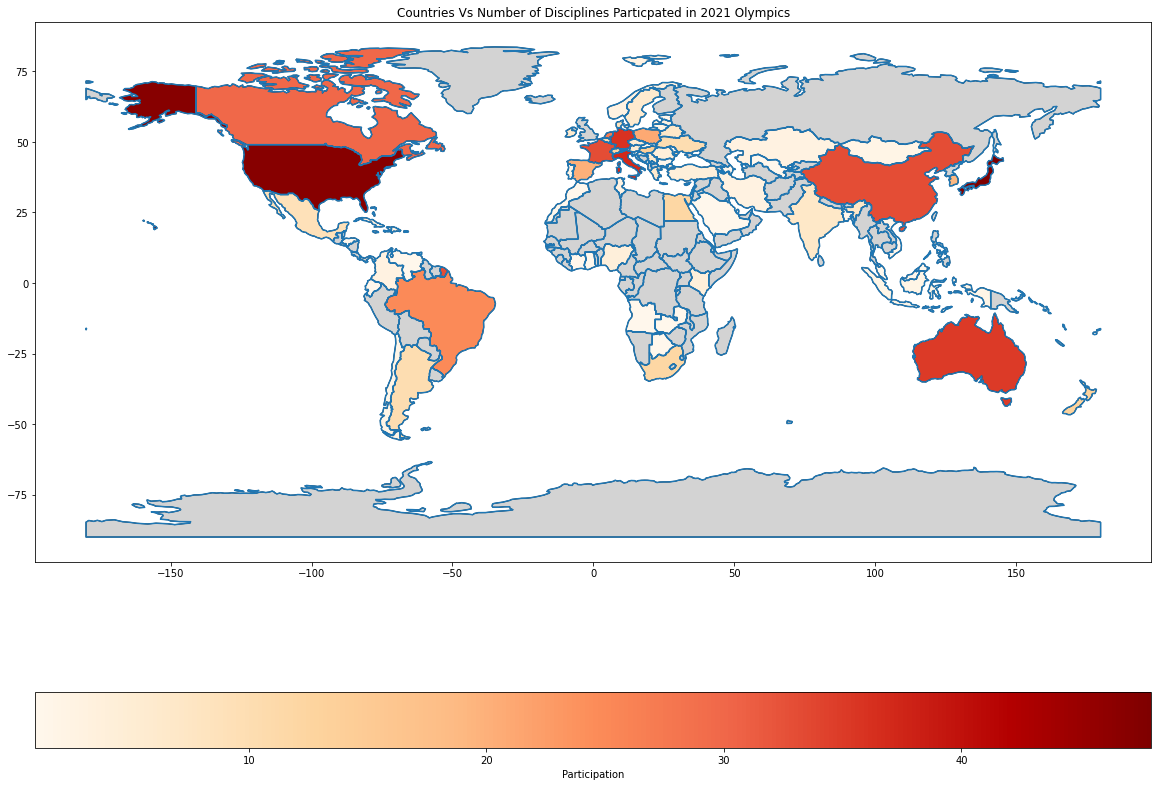

In [31]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))

world_teams_.plot(column= 'Discipline', ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"}, 
                    missing_kwds={'color': 'lightgrey'})
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

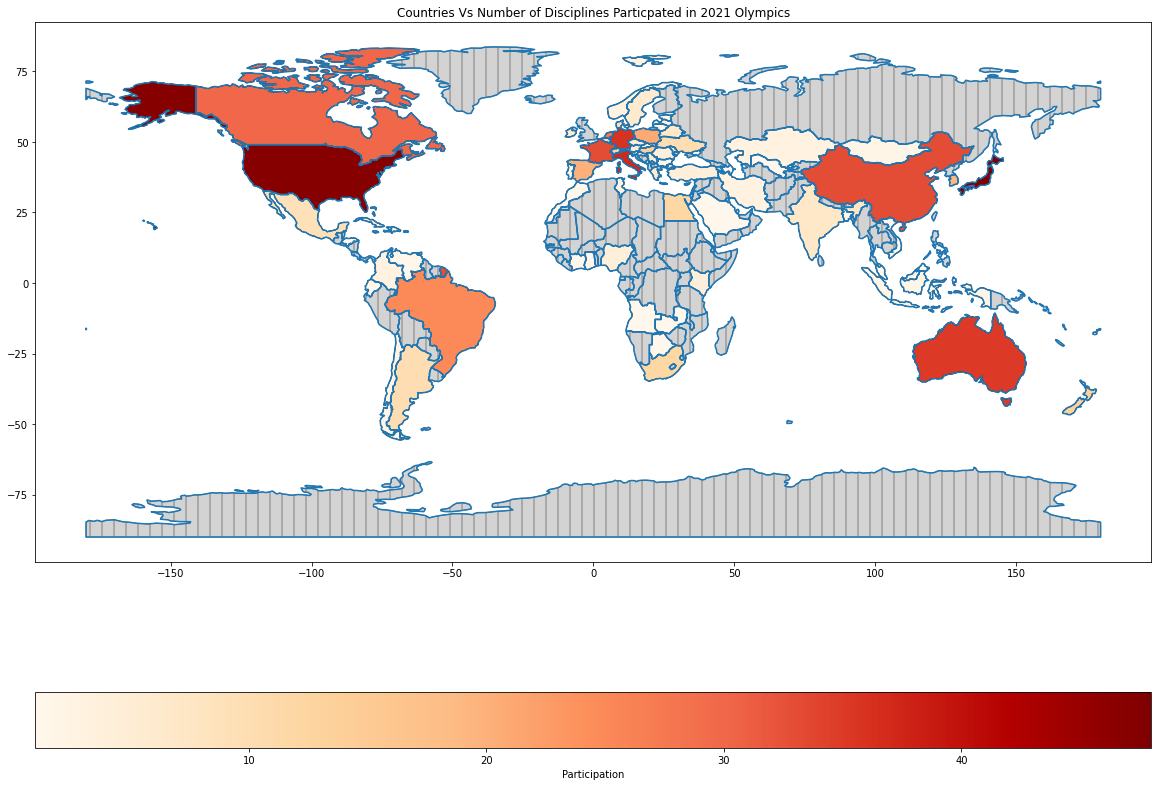

In [32]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))

world_teams_.plot(column= 'Discipline', ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"}, 
                    missing_kwds={"color": "lightgrey", "edgecolor": "grey", "hatch": "|", "label": "Missing values",},)
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

### Countries where women didn't participate

In [33]:
df_teams_ = df_teams.groupby(by=['NOC','Discipline','Event']).agg({'Event':'count', 'Discipline': 'count'})
df_teams_.rename(columns={'Event':'NumEvents', 'Discipline': 'NumDiscipline'}, inplace=True)
df_teams_.sort_values(by="NumDiscipline", axis=0, ascending=False)
df_teams_.reset_index(inplace=True)
df_teams_

NOC           Discipline             Event  \
0                      Angola             Handball             Women   
1                   Argentina           Basketball               Men   
2                   Argentina     Beach Volleyball               Men   
3                   Argentina     Beach Volleyball             Women   
4                   Argentina             Football               Men   
..                        ...                  ...               ...   
669  United States of America           Water Polo             Women   
670                Uzbekistan  Rhythmic Gymnastics  Group All-Around   
671                 Venezuela           Volleyball               Men   
672                   Vietnam              Archery        Mixed Team   
673                    Zambia             Football             Women   

     NumEvents  NumDiscipline  
0            1              1  
1            1              1  
2            1              1  
3            1              1  
4            1              1  
..         ...            ...  
669          1              1  
670          1              1  
671          1              1  
672          1              1  
673          1              1  

[674 rows x 5 columns]

In [34]:
df_teams_.sort_values(by=['NumEvents', 'NOC'], ascending=False)
df_teams_['Event'].unique()
df_teams_[(df_teams_['Event']=='Group All-Around')]
df_teams_

NOC           Discipline             Event  \
0                      Angola             Handball             Women   
1                   Argentina           Basketball               Men   
2                   Argentina     Beach Volleyball               Men   
3                   Argentina     Beach Volleyball             Women   
4                   Argentina             Football               Men   
..                        ...                  ...               ...   
669  United States of America           Water Polo             Women   
670                Uzbekistan  Rhythmic Gymnastics  Group All-Around   
671                 Venezuela           Volleyball               Men   
672                   Vietnam              Archery        Mixed Team   
673                    Zambia             Football             Women   

     NumEvents  NumDiscipline  
0            1              1  
1            1              1  
2            1              1  
3            1              1  
4            1              1  
..         ...            ...  
669          1              1  
670          1              1  
671          1              1  
672          1              1  
673          1              1  

[674 rows x 5 columns]

In [35]:
def getGender(x):
    if x[:3] == 'Men':
        return 'Men'
    elif x[:5] == 'Women':
        return 'Women'
    else:
        return 'Mixed'

df_teams_['Gender'] = df_teams_['Event'].apply(lambda x: getGender(x))
df_teams_['Gender'].unique()

array(['Women', 'Men', 'Mixed'], dtype=object)

In [36]:
df_teams_summary = pd.pivot_table(data = df_teams_, index=['Discipline'], columns=['Gender'], values='Event', aggfunc='count', fill_value=0)#, values=['Event'])
df_teams_summary['Total'] = df_teams_summary[['Men','Mixed','Women']].sum(axis=1)
df_teams_summary.sort_values(by='Total', ascending=False)

Gender               Men  Mixed  Women  Total
Discipline                                   
Swimming              45     15     44    104
Athletics             30     14     31     75
Cycling Track         32      0     31     63
Archery               10     26     10     46
Fencing               23      0     21     44
Table Tennis          14     14     14     42
Beach Volleyball      18      0     15     33
Artistic Swimming      0     30      0     30
Football              15      0     11     26
Hockey                12      0     11     23
Handball              12      0     11     23
Rugby Sevens          11      0     11     22
Water Polo            12      0      9     21
Artistic Gymnastics   10      0     11     21
Basketball            10      0     10     20
Volleyball            11      0      9     20
Triathlon              0     18      0     18
3x3 Basketball         7      0      7     14
Rhythmic Gymnastics    0     13      0     13
Baseball/Softball      0     10      0     10
Dominican Rep.         0      1      0      1
Czechia                0      1      0      1
China                  0      1      0      1
Iran                   0      1      0      1
Moldova                0      1      0      1
South Korea            0      1      0      1

In [37]:
df_teams_summary_1 = pd.pivot_table(data = df_teams_, index=['NOC'], columns=['Gender'], values='Event', aggfunc='count', fill_value=0)#, values=['Event'])
df_teams_summary_1['Total'] = df_teams_summary_1[['Men','Mixed','Women']].sum(axis=1)
df_teams_summary_1.sort_values(by='Total', ascending=False)

Gender                    Men  Mixed  Women  Total
NOC                                               
Japan                      20      9     19     48
United States of America   17      8     20     45
Italy                      14      8     14     36
Australia                  14      8     13     35
Germany                    17      5     13     35
...                       ...    ...    ...    ...
Iran                        0      1      0      1
Liechtenstein               0      1      0      1
Malaysia                    0      1      0      1
Moldova                     0      1      0      1
Zambia                      0      0      1      1

[84 rows x 4 columns]

In [38]:
df_teams_summary_2 = df_teams_summary_1[(df_teams_summary_1['Mixed'] == 0) & (df_teams_summary_1['Women']==0)]
df_teams_summary_2

Gender         Men  Mixed  Women  Total
NOC                                    
Bahrain          1      0      0      1
Botswana         1      0      0      1
Croatia          2      0      0      2
Côte d'Ivoire    1      0      0      1
Ghana            1      0      0      1
Honduras         1      0      0      1
Morocco          1      0      0      1
Portugal         2      0      0      2
Qatar            1      0      0      1
Saudi Arabia     1      0      0      1
Slovenia         2      0      0      2
Venezuela        1      0      0      1

In [39]:
df_teams_summary_2.reset_index(inplace=True)

In [40]:
df_teams_summary_2

Gender            NOC  Men  Mixed  Women  Total
0             Bahrain    1      0      0      1
1            Botswana    1      0      0      1
2             Croatia    2      0      0      2
3       Côte d'Ivoire    1      0      0      1
4               Ghana    1      0      0      1
5            Honduras    1      0      0      1
6             Morocco    1      0      0      1
7            Portugal    2      0      0      2
8               Qatar    1      0      0      1
9        Saudi Arabia    1      0      0      1
10           Slovenia    2      0      0      2
11          Venezuela    1      0      0      1

In [41]:
world_teams_2 = world.merge(df_teams_summary_2, how="right", left_on=['name'], right_on=['NOC'])
world_teams_2['centroid'] = world_teams_2.centroid

print("Type of DataFrame : ", type(world_teams_2),world_teams_2.shape[0])
world_teams_2

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 12


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_81489/2948228200.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_teams_2['centroid'] = world_teams_2.centroid


pop_est      continent           name iso_a3  gdp_md_est  \
0          NaN            NaN            NaN    NaN         NaN   
1    2214858.0         Africa       Botswana    BWA     35900.0   
2    4292095.0         Europe        Croatia    HRV     94240.0   
3   24184810.0         Africa  Côte d'Ivoire    CIV     87120.0   
4   27499924.0         Africa          Ghana    GHA    120800.0   
5    9038741.0  North America       Honduras    HND     43190.0   
6   33986655.0         Africa        Morocco    MAR    282800.0   
7   10839514.0         Europe       Portugal    PRT    297100.0   
8    2314307.0           Asia          Qatar    QAT    334500.0   
9   28571770.0           Asia   Saudi Arabia    SAU   1731000.0   
10   1972126.0         Europe       Slovenia    SVN     68350.0   
11  31304016.0  South America      Venezuela    VEN    468600.0   

                                             geometry            NOC  Men  \
0                                                None        Bahrain    1   
1   POLYGON ((29.43219 -22.09131, 28.01724 -22.827...       Botswana    1   
2   POLYGON ((16.56481 46.50375, 16.88252 46.38063...        Croatia    2   
3   POLYGON ((-8.02994 10.20653, -7.89959 10.29738...  Côte d'Ivoire    1   
4   POLYGON ((0.02380 11.01868, -0.04978 10.70692,...          Ghana    1   
5   POLYGON ((-83.14722 14.99583, -83.48999 15.016...       Honduras    1   
6   POLYGON ((-2.16991 35.16840, -1.79299 34.52792...        Morocco    1   
7   POLYGON ((-9.03482 41.88057, -8.67195 42.13469...       Portugal    2   
8   POLYGON ((50.81011 24.75474, 50.74391 25.48242...          Qatar    1   
9   POLYGON ((34.95604 29.35655, 36.06894 29.19749...   Saudi Arabia    1   
10  POLYGON ((13.80648 46.50931, 14.63247 46.43182...       Slovenia    2   
11  POLYGON ((-60.73357 5.20028, -60.60118 4.91810...      Venezuela    1   

    Mixed  Women  Total                    centroid  
0       0      0      1                        None  
1       0      0      1  POINT (23.77308 -22.09971)  
2       0      0      2   POINT (16.56619 45.01623)  
3       0      0      1    POINT (-5.61204 7.55376)  
4       0      0      1    POINT (-1.23697 7.92865)  
5       0      0      1  POINT (-86.58996 14.82295)  
6       0      0      1   POINT (-8.42048 29.88539)  
7       0      0      2   POINT (-8.05577 39.63405)  
8       0      0      1   POINT (51.18350 25.32185)  
9       0      0      1   POINT (44.51636 24.12329)  
10      0      0      2   POINT (14.93815 46.12542)  
11      0      0      1   POINT (-66.16383 7.16213)

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

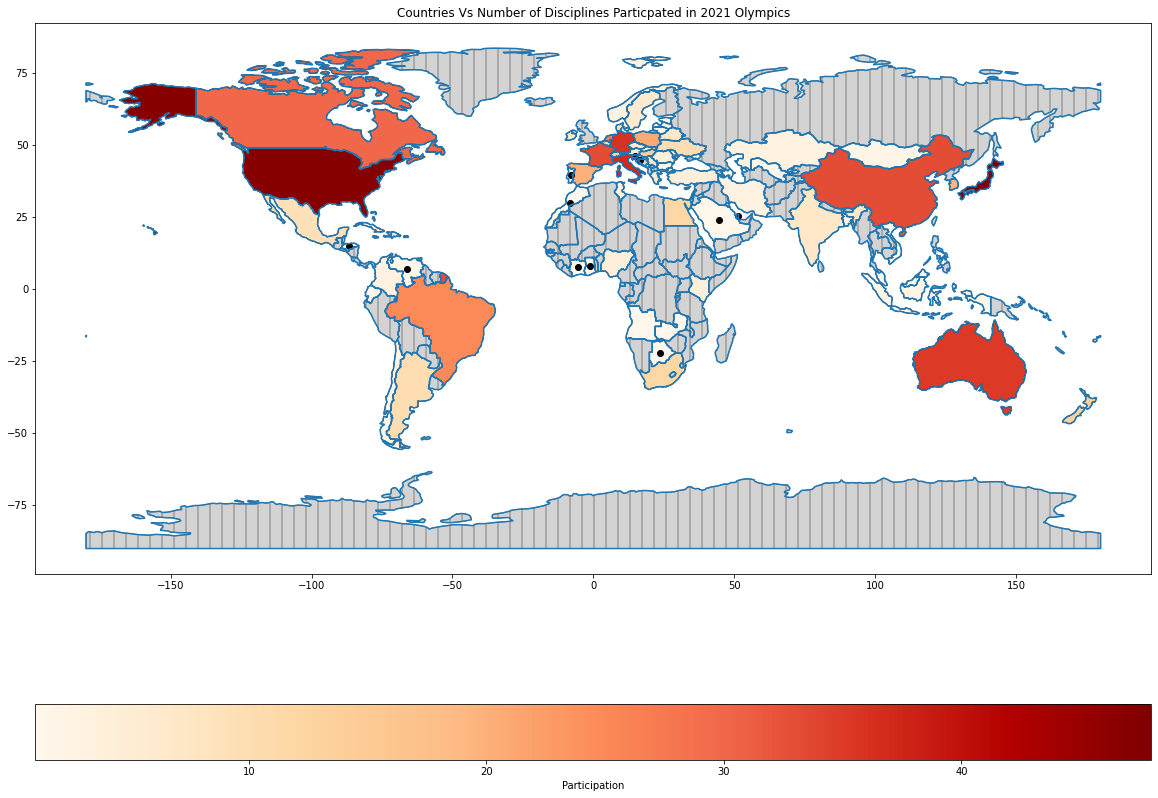

In [42]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) 

world_teams_.plot(column= 'Discipline', ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"}, 
                    missing_kwds={"color": "lightgrey", "edgecolor": "grey", "hatch": "|", "label": "Missing values",},)

world_teams_2["centroid"].plot(ax=ax, color="black")
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_81489/1422612365.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_teams_2['centroid'] = world_teams_2.centroid


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 23


Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

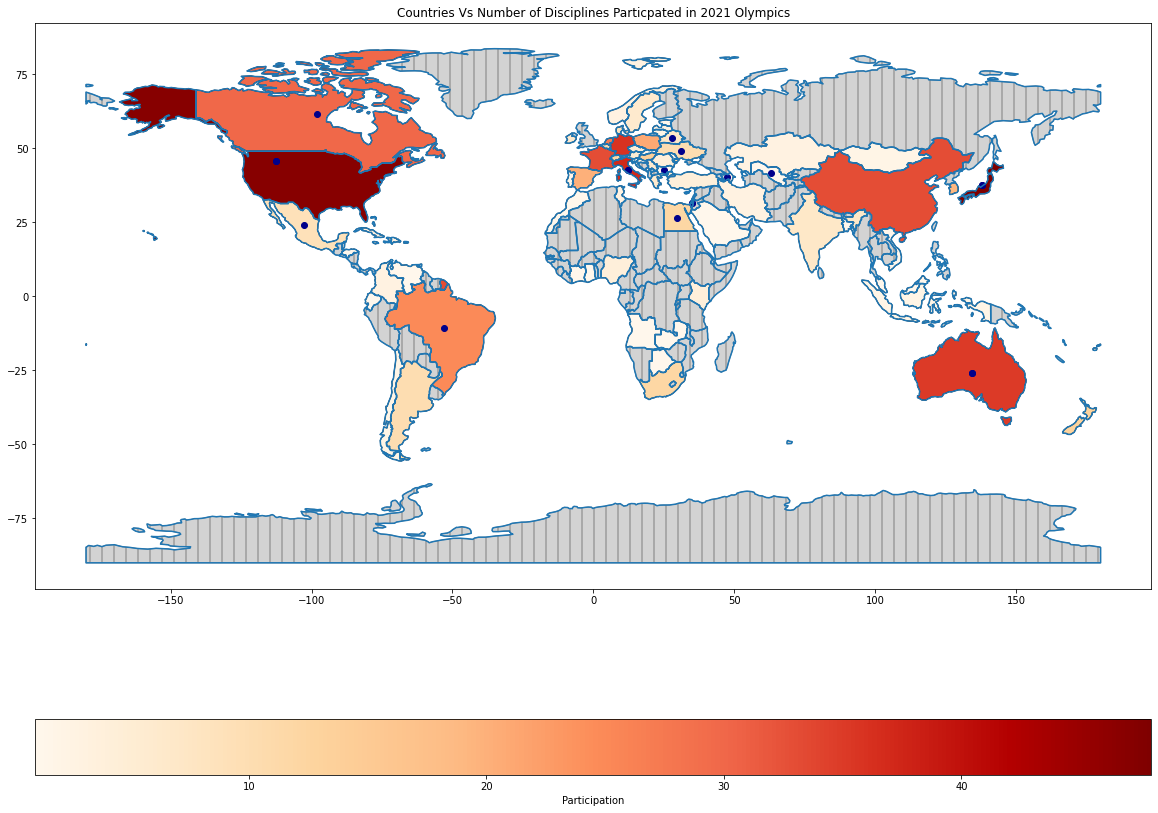

In [43]:
world_teams_2 = world.merge(df_teams_least_disciplines, how="right", left_on=['name'], right_on=['NOC'])
world_teams_2['centroid'] = world_teams_2.centroid

print("Type of DataFrame : ", type(world_teams_2),world_teams_2.shape[0])
world_teams_2

ax = world["geometry"].boundary.plot(figsize=(20,16)) 

world_teams_.plot(column= 'Discipline', ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"}, 
                    missing_kwds={"color": "lightgrey", "edgecolor": "grey", "hatch": "|", "label": "Missing values",},)

world_teams_2["centroid"].plot(ax=ax, color="DarkBlue")
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

### Miscellaneous

In [44]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [45]:
print(type(world_teams_['geometry']))
world_teams_['geometry']

<class 'geopandas.geoseries.GeoSeries'>


0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [46]:
world_teams_['geometry'].name = "region"
world_teams_.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
 6   NOC         77 non-null     object  
 7   Discipline  77 non-null     float64 
 8   centroid    177 non-null    geometry
dtypes: float64(2), geometry(2), int64(1), object(4)
memory usage: 13.8+ KB


In [47]:
geoseries_ = world_teams_['centroid']

print(type(geoseries_))
print(geoseries_.crs)

print(geoseries_[:5])
print(geoseries_[:5].distance)
print(geoseries_[:5].centroid)  
print(geoseries_[:5].geom_type)

<class 'geopandas.geoseries.GeoSeries'>
epsg:4326
0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid, dtype: geometry
<bound method GeoPandasBase.distance of 0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid, dtype: geometry>
0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
dtype: geometry
0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_81489/3673904869.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(geoseries_[:5].centroid)


In [48]:
geoseries_ = world_teams_['geometry']

print(type(geoseries_))
print(geoseries_.crs)

print(geoseries_[:5])
print(geoseries_[:5].distance)
print(geoseries_[:5].centroid)  
print(geoseries_[:5].geom_type)

<class 'geopandas.geoseries.GeoSeries'>
epsg:4326
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: region, dtype: geometry
<bound method GeoPandasBase.distance of 0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: region, dtype: geometry>
0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
dtype: geometry
0    MultiPolygon
1         Polygon
2         Polygon
3    MultiPolygon
4    MultiPolygon
dtype: object


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_81489/2912854152.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(geoseries_[:5].centroid)


### Countries - Least participated sport

In [49]:
df_teams_least = df_teams_[df_teams_['Discipline'].isin(['Rugby Sevens'])] #['Rhythmic Gymnastics', 'Baseball/Softball'])]
df_teams_least

NOC    Discipline  Event  NumEvents  NumDiscipline  \
8                   Argentina  Rugby Sevens    Men          1              1   
31                  Australia  Rugby Sevens    Men          1              1   
32                  Australia  Rugby Sevens  Women          1              1   
85                     Brazil  Rugby Sevens  Women          1              1   
114                    Canada  Rugby Sevens    Men          1              1   
115                    Canada  Rugby Sevens  Women          1              1   
169                      Fiji  Rugby Sevens    Men          1              1   
170                      Fiji  Rugby Sevens  Women          1              1   
193                    France  Rugby Sevens  Women          1              1   
259             Great Britain  Rugby Sevens    Men          1              1   
260             Great Britain  Rugby Sevens  Women          1              1   
312                   Ireland  Rugby Sevens    Men          1              1   
391                     Japan  Rugby Sevens    Men          1              1   
392                     Japan  Rugby Sevens  Women          1              1   
412                     Kenya  Rugby Sevens    Men          1              1   
413                     Kenya  Rugby Sevens  Women          1              1   
472               New Zealand  Rugby Sevens    Men          1              1   
473               New Zealand  Rugby Sevens  Women          1              1   
528                       ROC  Rugby Sevens  Women          1              1   
561              South Africa  Rugby Sevens    Men          1              1   
654  United States of America  Rugby Sevens    Men          1              1   
655  United States of America  Rugby Sevens  Women          1              1   

    Gender  
8      Men  
31     Men  
32   Women  
85   Women  
114    Men  
115  Women  
169    Men  
170  Women  
193  Women  
259    Men  
260  Women  
312    Men  
391    Men  
392  Women  
412    Men  
413  Women  
472    Men  
473  Women  
528  Women  
561    Men  
654    Men  
655  Women

In [50]:
teams_world_least = df_teams_least.merge(world, how="left", left_on=['NOC'], right_on=['name'])
print("Type of DataFrame : ", type(teams_world_least), teams_world_least.shape)
teams_world_least.head()

Type of DataFrame :  <class 'pandas.core.frame.DataFrame'> (22, 12)


NOC    Discipline  Event  NumEvents  NumDiscipline Gender  \
0  Argentina  Rugby Sevens    Men          1              1    Men   
1  Australia  Rugby Sevens    Men          1              1    Men   
2  Australia  Rugby Sevens  Women          1              1  Women   
3     Brazil  Rugby Sevens  Women          1              1  Women   
4     Canada  Rugby Sevens    Men          1              1    Men   

       pop_est      continent       name iso_a3  gdp_md_est  \
0   44293293.0  South America  Argentina    ARG    879400.0   
1   23232413.0        Oceania  Australia    AUS   1189000.0   
2   23232413.0        Oceania  Australia    AUS   1189000.0   
3  207353391.0  South America     Brazil    BRA   3081000.0   
4   35623680.0  North America     Canada    CAN   1674000.0   

                                            geometry  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
1  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  
2  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
4  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...

In [51]:
gdf = gpd.GeoDataFrame(teams_world_least, geometry=teams_world_least['geometry'])
print(type(gdf))
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


NOC    Discipline  Event  NumEvents  NumDiscipline Gender  \
0  Argentina  Rugby Sevens    Men          1              1    Men   
1  Australia  Rugby Sevens    Men          1              1    Men   
2  Australia  Rugby Sevens  Women          1              1  Women   
3     Brazil  Rugby Sevens  Women          1              1  Women   
4     Canada  Rugby Sevens    Men          1              1    Men   

       pop_est      continent       name iso_a3  gdp_md_est  \
0   44293293.0  South America  Argentina    ARG    879400.0   
1   23232413.0        Oceania  Australia    AUS   1189000.0   
2   23232413.0        Oceania  Australia    AUS   1189000.0   
3  207353391.0  South America     Brazil    BRA   3081000.0   
4   35623680.0  North America     Canada    CAN   1674000.0   

                                            geometry  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
1  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  
2  MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
4  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...

KeyError: 'NoDiscipline'

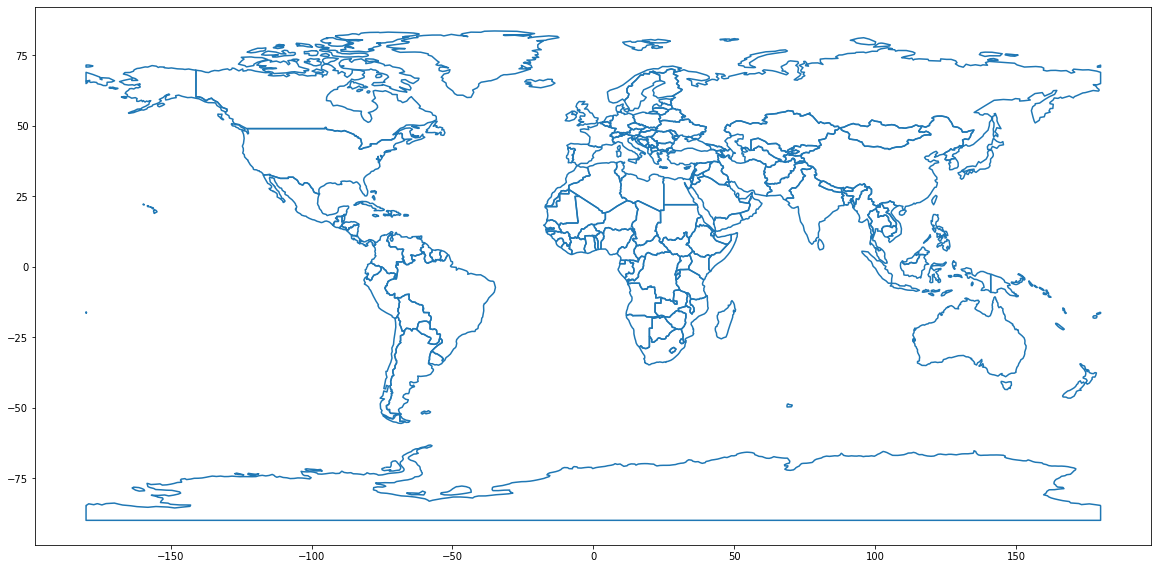

In [52]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))
gdf.plot("NoDiscipline", ax=ax, figsize=(20,16), cmap='coolwarm', legend=False) #, teams_world_least, legend_kwds={"label": "Participation", "orientation":"horizontal"})
plt.title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

### Countries - No participation

In [ ]:
teams_world = teams_.merge(world, how="left", left_on=['NOC'], right_on=['name'])
print("Type of DataFrame : ", type(teams_world), teams_world.shape[0])
teams_world.head()
# teams_world.info()
# teams_world.sort_values(by='Discipline', ascending=False)[:10]

In [ ]:
print(len(teams_world['NOC'].unique()))
print(teams_world['NOC'].unique())
world_teams_noparticipation = world_teams[world_teams['NOC'].isnull()]
print(world_teams_noparticipation)

In [ ]:
world_teams_noparticipation

In [ ]:
world_teams_noparticipation['Discipline'] = world_teams_noparticipation['Discipline'].fillna(0)
world_teams_noparticipation.head()

In [ ]:
ax = world["geometry"].boundary.plot(figsize=(20,16)) #plot(figsize=(20,16))
world_teams_noparticipation.plot("Discipline", ax=ax, figsize=(20,16), edgecolor="black", cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})
plt.title("Countries Not Particpated in 2021 Olympics")

## EntriesGender

In [ ]:
df_genderentries = pd.read_excel("data/EntriesGender.xlsx")
df_medals = pd.read_excel("data/Medals.xlsx")

In [ ]:
print(df_genderentries.info())
print(len(df_genderentries['Discipline'].unique().tolist()))
df_genderentries.sort_values(by='Total', ascending=False)

## Medals

In [ ]:
df_medals.info()


In [ ]:
df_medals